<a href="https://colab.research.google.com/github/kaushikabhishek87/Tensorflow_projects/blob/main/07_Food_101_tensorflow_datasets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
! nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-2ec74a63-f79d-b3ef-8632-5c57ec9e7641)


In [5]:
import tensorflow as tf
import tensorflow_datasets as tfds

In [12]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
from helper_functions import plot_loss_curves, compare_historys

--2021-06-27 07:00:25--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py.3’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2021-06-27 07:00:25 (105 MB/s) - ‘helper_functions.py.3’ saved [10246/10246]



In [6]:
(train, test), ds_info  = tfds.load(name="food101",
                                  split=["train", 'validation'],
                                  shuffle_files=True,
                                  as_supervised=True,
                                  with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incomplete2OGL24/food101-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/food101/2.0.0.incomplete2OGL24/food101-validation.tfrecord


Dataset food101 downloaded and prepared to /root/tensorflow_datasets/food101/2.0.0. Subsequent calls will reuse this data.


In [30]:
# Get the class names
class_names = ds_info.features["label"].names
class_names[0:10], len(class_names)

(['apple_pie',
  'baby_back_ribs',
  'baklava',
  'beef_carpaccio',
  'beef_tartare',
  'beet_salad',
  'beignets',
  'bibimbap',
  'bread_pudding',
  'breakfast_burrito'],
 101)

In [40]:
train_one_sample = train.take(2)
train_one_sample

<TakeDataset shapes: ((None, None, 3), ()), types: (tf.uint8, tf.int64)>

In [43]:
# Output info about training set 
for image, label in train_one_sample:
  print(image.shape,"\n" , image.dtype,"\n",  label,"\n",  class_names[label] )

(512, 512, 3) 
 <dtype: 'uint8'> 
 tf.Tensor(49, shape=(), dtype=int64) 
 grilled_cheese_sandwich
(512, 512, 3) 
 <dtype: 'uint8'> 
 tf.Tensor(23, shape=(), dtype=int64) 
 churros


In [44]:
import tensorflow as tf
image, tf.reduce_max(image), tf.reduce_min(image)

(<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
 array([[[ 93,  34,  40],
         [ 93,  34,  40],
         [ 94,  35,  41],
         ...,
         [ 52,  15,  23],
         [ 52,  15,  23],
         [ 52,  15,  23]],
 
        [[ 93,  34,  40],
         [ 93,  34,  40],
         [ 94,  35,  41],
         ...,
         [ 52,  15,  23],
         [ 52,  15,  23],
         [ 52,  15,  23]],
 
        [[ 93,  34,  40],
         [ 93,  34,  40],
         [ 94,  35,  41],
         ...,
         [ 54,  14,  23],
         [ 52,  15,  23],
         [ 52,  15,  23]],
 
        ...,
 
        [[108,  31,  49],
         [106,  29,  47],
         [105,  28,  46],
         ...,
         [121,  38,  56],
         [122,  39,  59],
         [123,  40,  60]],
 
        [[107,  30,  48],
         [107,  30,  48],
         [107,  30,  48],
         ...,
         [121,  38,  58],
         [123,  40,  60],
         [123,  40,  60]],
 
        [[106,  29,  47],
         [108,  31,  49],
         [109,

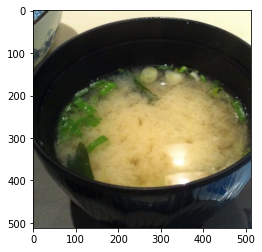

In [38]:
import matplotlib.pyplot as plt
plt.imshow(image)

In [45]:
# Pre Proceesing Fucntion

def preprocess_image(image, label, img_shape=224):
  image = tf.image.resize(image, [img_shape,img_shape])
  # image = image/255 # Scale image , Not required with EfficientBX.. as it already have a Nomralisation layer
  return tf.cast(image, tf.float32), label # Return a tuple of image & label

In [46]:
preprocess_image(image=image, label=label)

(<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
 array([[[ 93.      ,  34.      ,  40.      ],
         [ 94.      ,  35.      ,  41.      ],
         [ 95.      ,  36.      ,  42.      ],
         ...,
         [ 55.      ,  15.      ,  24.      ],
         [ 52.      ,  15.      ,  23.      ],
         [ 52.      ,  15.      ,  23.      ]],
 
        [[ 93.92857 ,  34.928574,  40.928574],
         [ 93.07143 ,  34.071426,  40.071426],
         [ 94.      ,  35.      ,  41.      ],
         ...,
         [ 55.      ,  15.      ,  24.      ],
         [ 54.      ,  14.      ,  23.      ],
         [ 52.      ,  15.      ,  23.      ]],
 
        [[ 93.928566,  35.357143,  41.57143 ],
         [ 91.64285 ,  33.071426,  39.285713],
         [ 91.78571 ,  33.214287,  39.428574],
         ...,
         [ 54.      ,  14.      ,  23.      ],
         [ 55.      ,  15.      ,  24.      ],
         [ 55.      ,  15.      ,  24.      ]],
 
        ...,
 
        [[108.01023 ,  31.010233

In [48]:
## Referring to best practices from tensorflow docuemntation - data performamce

## Batch & Prepare datasets usinga, Data Input PIPE LINE
#### Map Preprocesing function to train data (and parrlalise it)
train_data = train.map(map_func=preprocess_image, num_parallel_calls=tf.data.AUTOTUNE)

# Shuffle Train data & turn into batches for loading faster
train_data = train_data.shuffle(buffer_size=10000).batch(batch_size=32).prefetch(buffer_size=tf.data.AUTOTUNE) # 10000 Sample at a time , depends upon memory

# Map Preprocessing test data
test_data = test.map(preprocess_image, num_parallel_calls=tf.data.AUTOTUNE).batch(32).prefetch(buffer_size=tf.data.AUTOTUNE)

In [49]:
train_data,test_data

(<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>,
 <PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>)

In [52]:
## Modelling callbacks

# Model Checkpoint
checkpoint_path = "model_checkpoints/cp.ckpt"

model_checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, monitor ="val_loss",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      verbose=0)

In [ ]:
## Setup Mixed Precision Training
